In [1]:
import numpy as np
import tqdm 
import os
import osyris
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate
import sys

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1 import make_axes_locatable

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, dist
from pipeline_streamers import phi_average

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 24}
mpl.rc('font', **font)

In [16]:
0.5*(400 - 343)

28.5

In [14]:
snapshots = [343, 372, 400]
data_toplot = {key: {} for key in snapshots}

  0%|          | 0/3 [00:00<?, ?it/s]

Transforming old z-coordinate into mean angular momentum vector


/lustre/hpc/astro/kxm508/codes/python_dispatch/plot_production/../pipeline_scripts/pipeline_streamers.py:174: RuntimeWarning: invalid value encountered in true_divide
  hist_ρ = hist_mass * self.sn.scaling.m / hist_vol
 33%|███▎      | 1/3 [00:52<01:44, 52.32s/it]

Transforming old z-coordinate into mean angular momentum vector


 67%|██████▋   | 2/3 [01:49<00:55, 55.17s/it]

Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 3/3 [02:16<00:00, 45.45s/it]


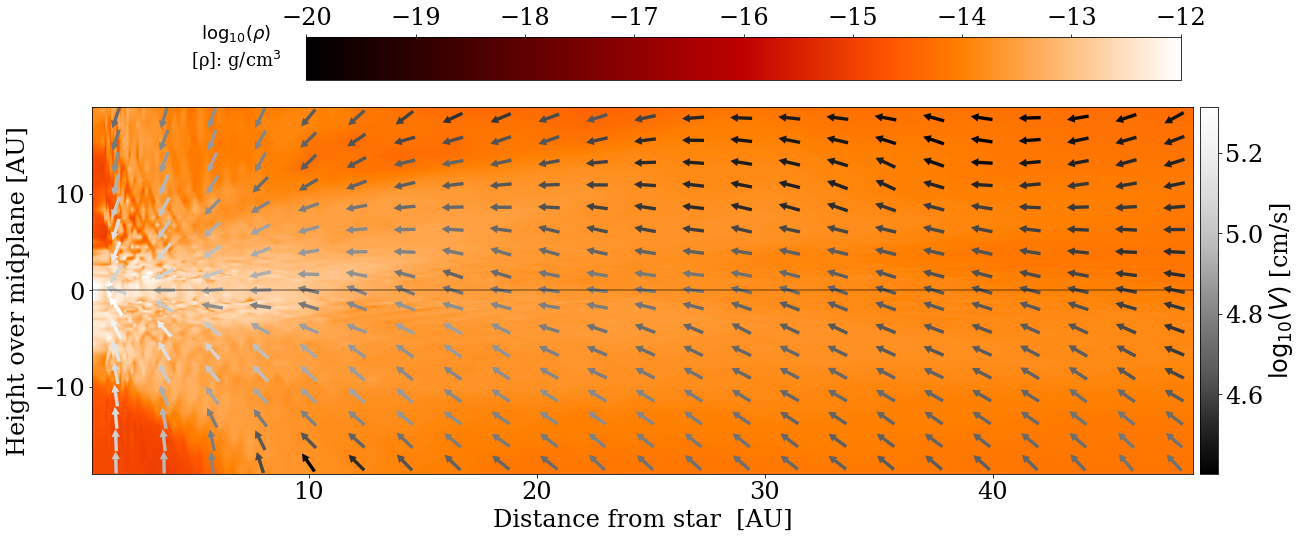

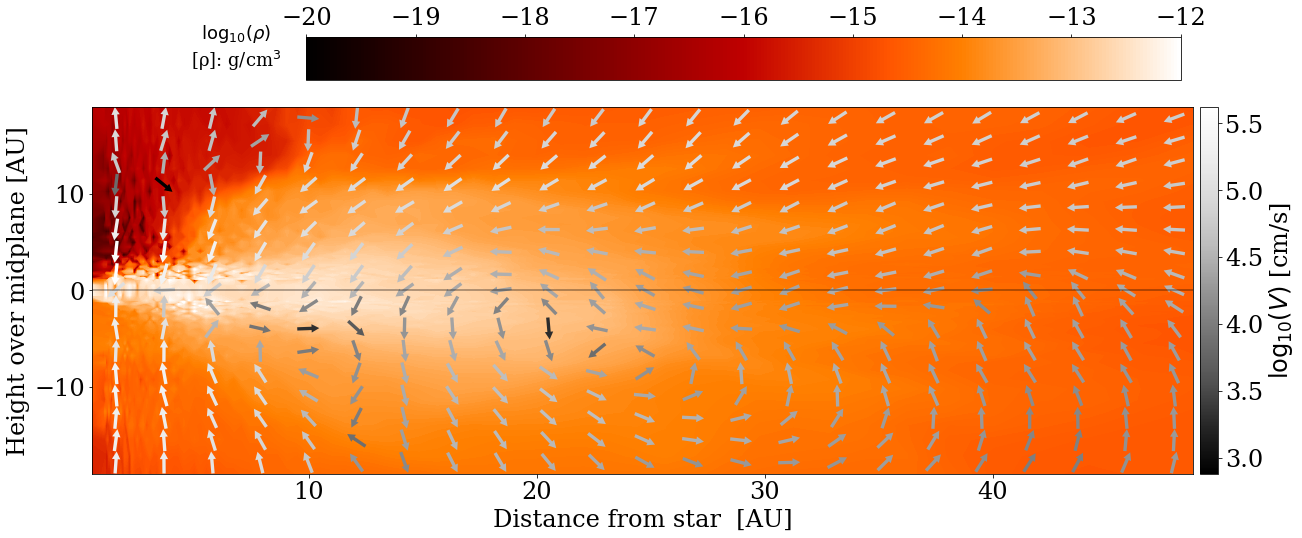

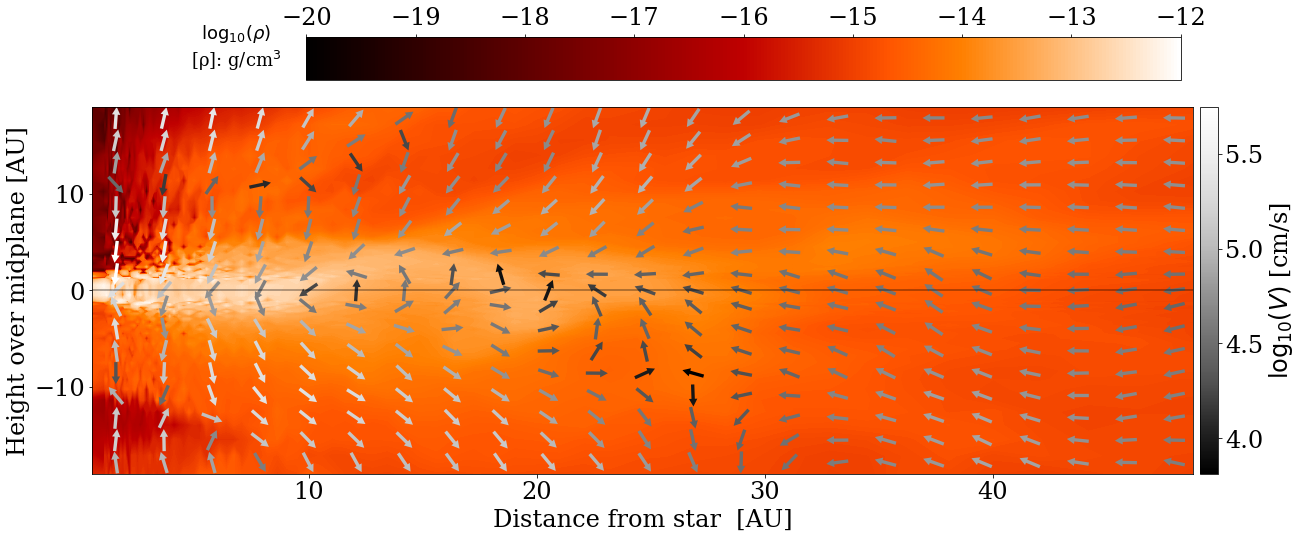

In [15]:
for sn in tqdm.tqdm(snapshots):
    data = pipeline(snap = sn, run = 'sink122core02', sink_id=122, loading_bar=False, verbose = 0)
    data.recalc_L(verbose = 0);
    data_toplot[sn] = data.phiaverage(quiver_dens=0.3) 

In [4]:
data_toplot[223].keys()

dict_keys(['r_bins', 'z_bins', 'd', 'quiver_r_bins', 'quiver_z_bins', 'hist_vr', 'hist_vz', 'arrow_length'])

In [5]:
data_toplot[223]['arrow_length']

array([[ 64345.41649508,  58889.93181425,  53920.10508648,
         65454.44936098,  97533.66966514, 134694.40664475,
        164485.41332196, 160625.42380644, 117950.30873234,
        137904.37193221, 103690.98688186,  56382.78119009,
         44408.30578313,  37577.22709839,  31192.96768287,
         24576.37895909,  20719.69175323],
       [ 60129.72611823,  54666.82376992,  59470.09115147,
         76164.57258123,  90606.81946361, 109704.6139728 ,
        114329.77469769, 117300.31024596, 121904.14678996,
         91299.09938908,  66812.56419633,  50966.2397716 ,
         43223.6686107 ,  35173.34721249,  24143.83768425,
         11609.69071885,   4354.11800048],
       [ 58339.96718393,  63811.7824944 ,  70432.115342  ,
         76694.57031267,  80590.99315231,  89287.75438673,
         94616.93313073,  94942.44236072,  97101.9514667 ,
         80788.93083777,  51229.78205552,  32330.94718868,
         25499.36541512,  23307.23107981,  17052.25997994,
          8232.94902415,   54

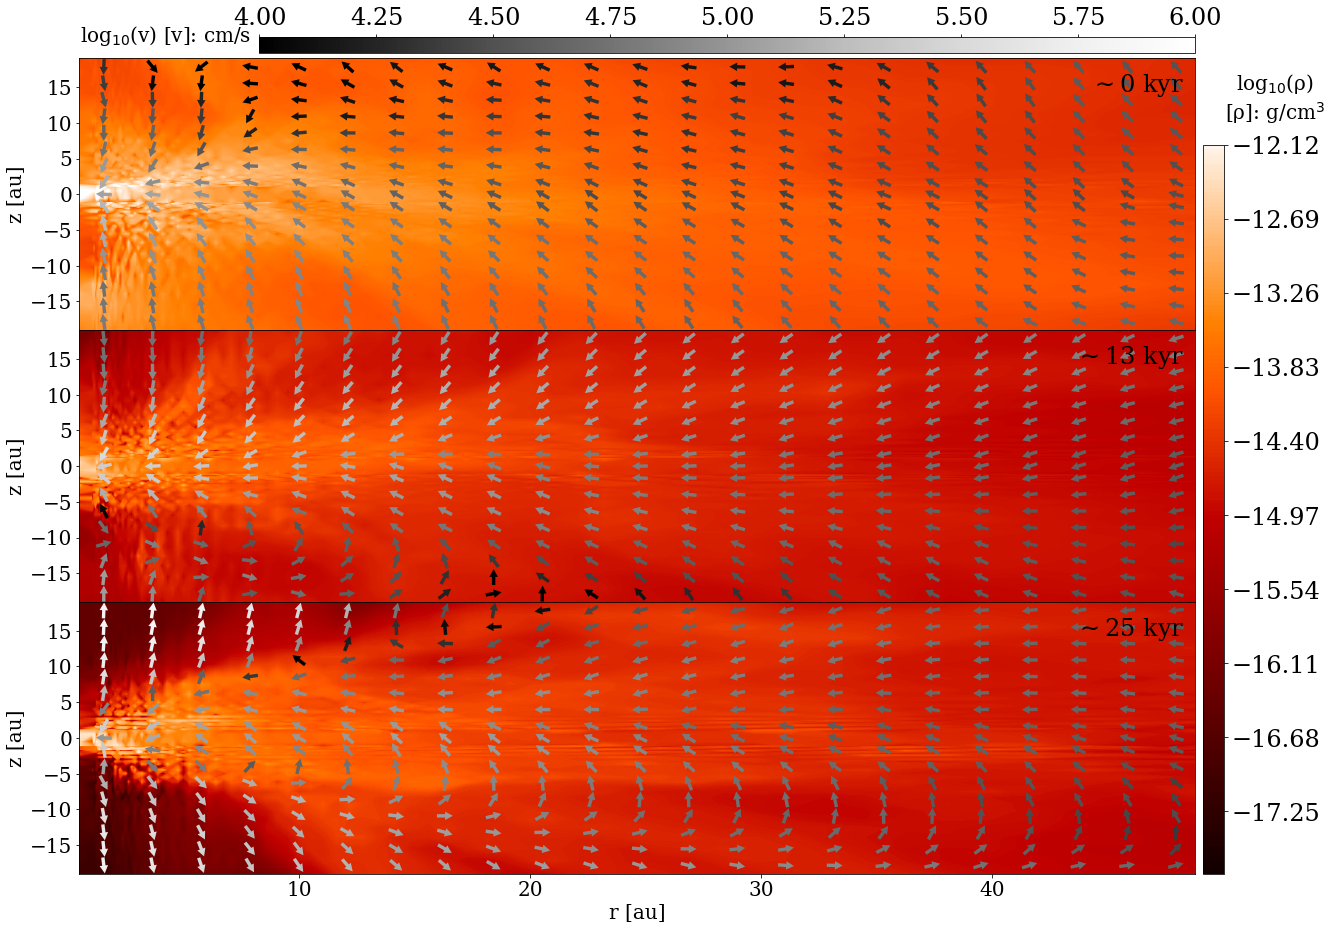

In [6]:
log_vmin=-18; log_vmax=-12; quiver_dens = 0.4

norm = mpl.colors.Normalize(vmin=4,vmax=6.,clip=False)
fig, axs = plt.subplots(len(snapshots), 1, figsize = (20, 5 * len(snapshots)))

for ax in axs.flatten():
    ax.set_xlabel('r [au]', fontsize=20); ax.set_ylabel('z [au]', fontsize=20)
    ax.tick_params(axis='x', labelsize=20); ax.tick_params(axis='y', labelsize=20)
    ax.set_yticks(np.arange(-15, 20, 5))

for ax in axs.flatten()[:len(snapshots) - 1]:
    ax.set_xticklabels([])

for ax, sn in zip(axs.flatten(), snapshots):
    r = data_toplot[sn]['quiver_r_bins'] * data.au_length
    z = data_toplot[sn]['quiver_z_bins'] * data.au_length
    vr = data_toplot[sn]['hist_vr']
    vz = data_toplot[sn]['hist_vz']
    arrow_length = data_toplot[sn]['arrow_length']

    cs = ax.contourf((data_toplot[sn]['r_bins'] * data.au_length), (data_toplot[sn]['z_bins'] * data.au_length), np.log10(data_toplot[sn]['d'].T), vmin=log_vmin, vmax=log_vmax, origin='lower', levels=200, cmap='gist_heat')
    quiver = ax.quiver(r, z, vr, vz, (np.log10(arrow_length)), cmap=(mpl.cm.Greys_r), norm = norm,
            headwidth=2.5,
            headaxislength=2.3,
            headlength=2.3,
            pivot='mid',
            scale=70)
    
    ax.text(0.99, 0.95, f'$\sim${(sn - 222)*0.5:1.0f} kyr', transform=ax.transAxes, ha='right', va='top', fontsize = 24)


cbaxes = fig.add_axes([0.905, 0.125, 0.015, 0.675])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.set_label('log$_{10}$(ρ)\n[ρ]: g/cm$^3$', labelpad = -45, y = 1.1, rotation = 0, fontsize = 20)

cbaxes = fig.add_axes([0.25, 0.885, 0.65, 0.015])  # Position and size adjusted for top placement
cbar_vel = fig.colorbar(quiver, cax=cbaxes, orientation='horizontal')  # Set orientation to horizontal
cbar_vel.set_label('log$_{10}$(v) [v]: cm/s', labelpad=-35, x=-0.1, rotation=0, fontsize=20)
cbar_vel.ax.xaxis.set_ticks_position('top')
cbar_vel.ax.xaxis.set_label_position('top')

fig.subplots_adjust(wspace=0, hspace=0)

fig.savefig('/groups/astro/kxm508/codes/python_dispatch/plot_production/plots_for_michael/phiavg', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [7]:
os.getcwdb()

b'/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python'